# Sentinel S2 Downloader
This notebook presents the basic usage for the SentinelDownloader. <br>
This package is intended for downloading Sentinel2 images and storing them into a simple structure.

## Initializing the downloader

In [1]:
%load_ext autoreload
%autoreload 2

from sentineldownloader import SSatDownloader, ApiUrl
import logging

In [4]:
ApiUrl.copernicus_hub

'https://scihub.copernicus.eu/dhus'

In [5]:
valid_user = 'hybam'
valid_pass = 'hybampass'

# for a more verbose usage, consider using logging.DEBUG as logging level
downloader = SSatDownloader(valid_user, valid_pass, ApiUrl.copernicus_hub, logger_level=logging.INFO)
downloader

SSatDownloader class
---- Database --- 
Database not initialized. Open or create a new database.
---- SEARCH ---- 
Empty search. Make a new query/search first.

The first step is to create a folder ('database') to store the images and the quicklooks.<br>
If the database is already created, we can use `downloader.open_database` to open it.

In [10]:
downloader.create_database('d:/images/22KEV')

## Searching by tile
The simples way to search an image is by tile, level and dates. This can be accomplished using the `downlaoder.search` method.<br>
If `search_online=True`, the search will take more time to complete and the online status will be verified for every image in the search results.

In [9]:
downloader.search?

Signature:
downloader.search(
    tile_id=None,
    polygon=None,
    start=None,
    end=None,
    level=None,
    post_filter=None,
    **kwargs,
)
Docstring:
A simplified search method for Sentinel2 imagery. It searches by tile_id or bbox (not both).
More parameters can be passed to the query by the key-word arguments (**kwkargs).
:param tile_id: identification of the tile (ex. '23KKQ')
:param polygon: Polygon in the format [(long1, lat1), (long2, lat2), ...]
If just one tuple (long, lat) is passed, it will be assumed a Point geometry.
:param start: start date 'YYYYMMDD' or 'YYYY-MM-DDThh:mm:ss'. If None is passed, Today-1 is considered
:param end: start date 'YYYYMMDD' or 'YYYY-MM-DDThh:mm:ss'. If None, Today is considered.
:param level: 'Level-2A' or 'Level-1C' or None for both
:return: None. Attribute .search_df will be filled.
File:      d:\onedrive - agência nacional de águas\projects\sentineldownloader\src\sentineldownloader\ssat_downloader.py
Type:      method


In [30]:
downloader.search(tile_id='22KEV', start='20210701', end='20210731', level='Level-2A', search_online=True)

Retrieving product online status. This may take a while...
---- Database --- 
5 images / 4 online / 5 downloaded 

---- SEARCH ---- 
6 images found on server/ 6 online / 5 downloaded



The `search_df` stores the images that have been found on the server and the online status. 

In [13]:
downloader.search_df

,tile,date,platformserialidentifier,processinglevel,producttype,size,online,downloaded,qlook
3ce056c6-98d7-4bd0-acc2-5a6cbb11c66a,22KEV,20210726,Sentinel-2A,Level-2A,S2MSI2A,1.07 GB,True,False,False
53793812-8f09-49be-bda4-a767f14b7757,22KEV,20210721,Sentinel-2B,Level-2A,S2MSI2A,1.04 GB,True,False,False
9f2a2b3d-0cf9-4c14-aae5-969f3ef71e27,22KEV,20210716,Sentinel-2A,Level-2A,S2MSI2A,860.22 MB,True,False,False
828c9e6a-3dac-40ba-9ad1-932c31990d60,22KEV,20210711,Sentinel-2B,Level-2A,S2MSI2A,1.06 GB,True,False,False
7d610c88-d80b-4315-9d23-fe00b6b5a053,22KEV,20210706,Sentinel-2A,Level-2A,S2MSI2A,1.06 GB,True,False,False
83142756-824b-4065-882d-a5aee2e2366b,22KEV,20210701,Sentinel-2B,Level-2A,S2MSI2A,1.04 GB,False,False,False


## Quickview and Filtering

Once we have found some images, it is possible to display the quickviews and filter the results. <br>
The filtering process is important so we download only the desired images.<br>
All fields in the search dataframe can be used for the filtering. Here is an example:

Title Format: TileId / Date / Is Online / Is Downloaded


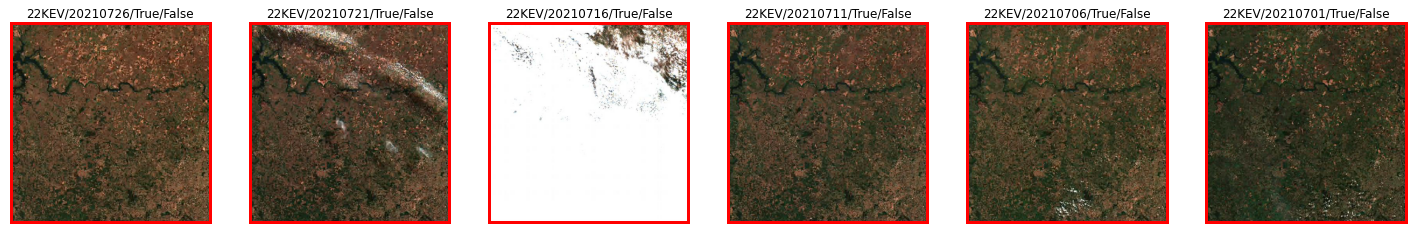

In [31]:
downloader.plot_quick_looks()

In [18]:
downloader._search_df.columns

Index(['title', 'link', 'link_alternative', 'link_icon', 'summary', 'ondemand',
       'generationdate', 'beginposition', 'endposition', 'ingestiondate',
       'orbitnumber', 'relativeorbitnumber', 'illuminationazimuthangle',
       'illuminationzenithangle', 'vegetationpercentage',
       'notvegetatedpercentage', 'waterpercentage', 'unclassifiedpercentage',
       'mediumprobacloudspercentage', 'highprobacloudspercentage',
       'snowicepercentage', 'cloudcoverpercentage', 'level1cpdiidentifier',
       'gmlfootprint', 'footprint', 'format', 'processingbaseline',
       'platformname', 'filename', 'instrumentname', 'instrumentshortname',
       'size', 's2datatakeid', 'producttype', 'platformidentifier',
       'orbitdirection', 'platformserialidentifier', 'processinglevel',
       'datastripidentifier', 'granuleidentifier', 'identifier', 'uuid',
       'date', 'tile', 'online', 'downloaded', 'qlook'],
      dtype='object')

In [32]:
downloader.filter_results(query='cloudcoverpercentage < 80')

Title Format: TileId / Date / Is Online / Is Downloaded


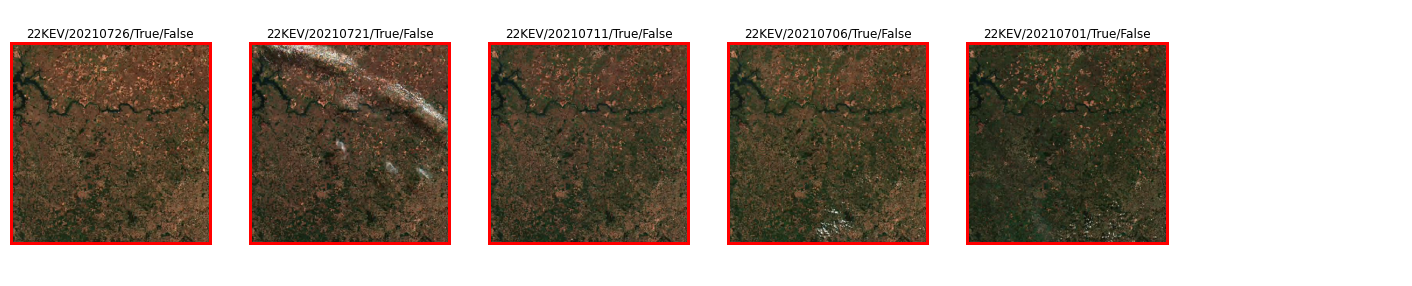

In [33]:
downloader.plot_quick_looks(query='online==True')

In [25]:
downloader.search_df

,tile,date,platformserialidentifier,processinglevel,producttype,size,online,downloaded,qlook
3ce056c6-98d7-4bd0-acc2-5a6cbb11c66a,22KEV,20210726,Sentinel-2A,Level-2A,S2MSI2A,1.07 GB,True,False,True
53793812-8f09-49be-bda4-a767f14b7757,22KEV,20210721,Sentinel-2B,Level-2A,S2MSI2A,1.04 GB,True,False,True
828c9e6a-3dac-40ba-9ad1-932c31990d60,22KEV,20210711,Sentinel-2B,Level-2A,S2MSI2A,1.06 GB,True,False,True
7d610c88-d80b-4315-9d23-fe00b6b5a053,22KEV,20210706,Sentinel-2A,Level-2A,S2MSI2A,1.06 GB,True,False,True
83142756-824b-4065-882d-a5aee2e2366b,22KEV,20210701,Sentinel-2B,Level-2A,S2MSI2A,1.04 GB,False,False,True


## Downloading images

Once we have the images already filtered, we can command `download_all`. It will pass all the images that are in the `search_df` into the `database_df` and start downloading them.<br>
The download can occur in the background or not. 

### Download in the background

Once the downloader has found images to download, they can be downloaded directly with `downloader.download_all`. <br>
If background is set to True, the downloading will occur in the background and the status can be checked by `downloader.download_status`

In [34]:
downloader.download_all(background=True)

To see the download list, access the .to_download attribute
To check the download status, use the .download_status() method.


In [39]:
downloader.download_status

Downloading: 0/5 completed.


### Download in the foreground

In [26]:
downloader.download_all(background=False)

LTA retrieval:   0%|          | 0/1 [00:00<?, ?product/s]

MD5 checksumming:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

MD5 checksumming:   0%|          | 0.00/1.11G [00:00<?, ?B/s]